In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv('price.csv', low_memory=False)

In [197]:
df = df.sort_values('Date')

In [198]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Volume_Lag1'] = df['Volume'].shift(1)

In [199]:
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()

In [200]:
df = df.dropna()

In [201]:
features = ['Close_Lag1', 'Close_Lag2', 'Volume_Lag1', 'MA5', 'MA10']
target = ['Close']

In [202]:
X = df[features]
y = df['Close']

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4705, 5), (1177, 5), (4705,), (1177,))

In [204]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [205]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y_pred = lr.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

58.10425085307016 76.37903237617034


In [206]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=1.0)
y_pred = rr.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

58.10425124899048 76.37903397668771


In [207]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.1)
y_pred = ls.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

64.89618626471228 86.8435714931456


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.084e+06, tolerance: 2.210e+06
  model = cd_fast.enet_coordinate_descent(


In [208]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=0)

pr = LinearRegression()
y_pred = pr.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

58.10425085307016 76.37903237617034


In [209]:
from sklearn.linear_model import ElasticNet

er = ElasticNet(alpha=0.1, l1_ratio=0.5)
y_pred = er.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

64.89600027153928 86.8433199830668


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.084e+06, tolerance: 2.210e+06
  model = cd_fast.enet_coordinate_descent(


In [210]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
y_pred = dt.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

102.66309610138329 133.49652781709807


In [211]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
y_pred = rf.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

67.56174681268917 89.15532502813652


In [212]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
y_pred = nn.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

2903.1003270182055 3011.9950874305177


In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
y_pred = svr.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

2718.3830936832087 2814.8105270499914


In [214]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y_pred = lr.fit(X_train, y_train).predict(X_test)

print(mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)))

58.10425085307016 76.37903237617034


In [215]:
valid = pd.DataFrame(y_test)
valid['Predicted'] = y_pred

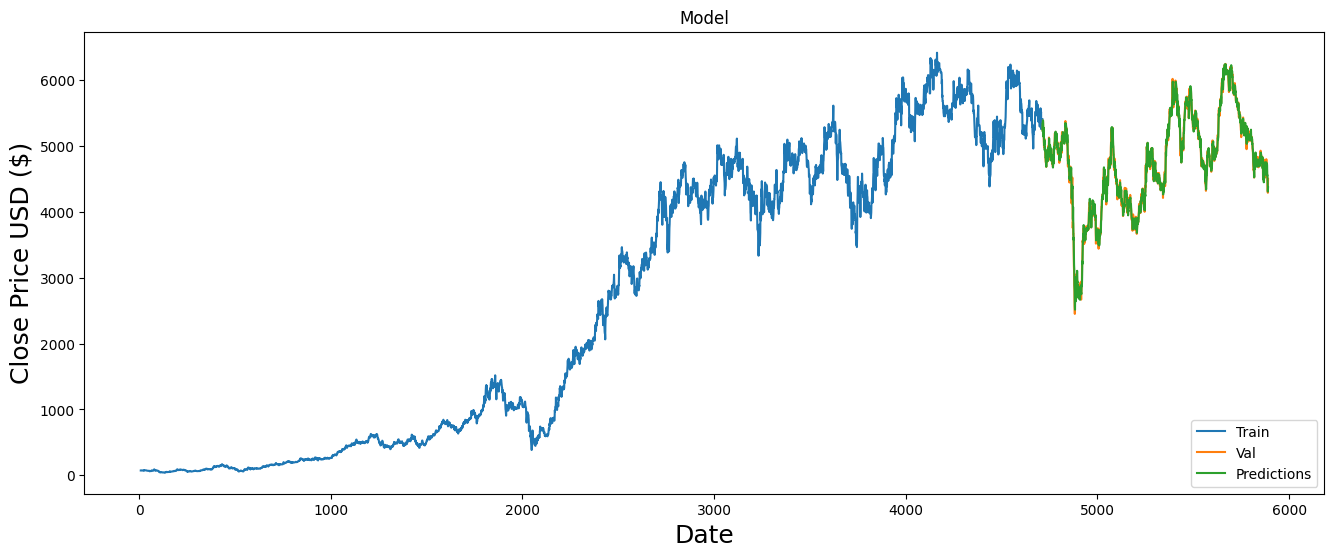

In [216]:
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_train)
plt.plot(valid[['Close', 'Predicted']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [217]:
latest_data = df.iloc[-1]

features = np.array([
    latest_data['Close_Lag1'],
    latest_data['Close_Lag2'],
    latest_data['Volume_Lag1'],
    latest_data['MA5'],
    latest_data['MA10']
]).reshape(1, -5)

In [218]:
print(lr.predict(features))

[4370.86147355]


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
